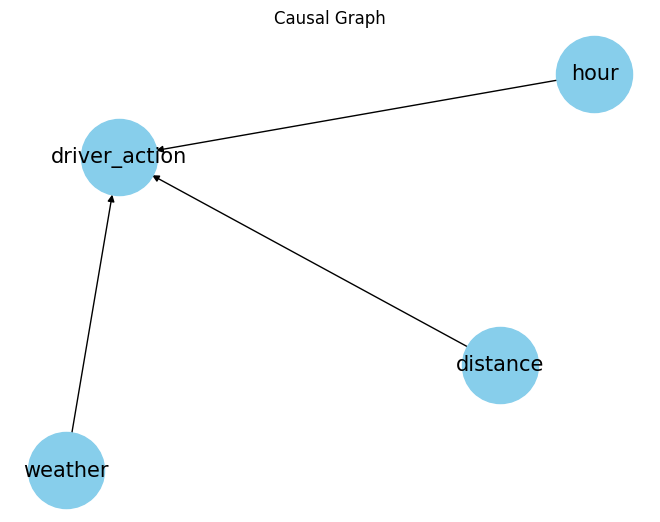

KeyError: "None of [Index(['hour', 'distance', 'weather'], dtype='object')] are in the [columns]"

In [5]:
import pandas as pd
import sys
sys.path.append('..')
from src.data_loader import DataLoader
from src.casual_inference import CausalInference

# Load data
data = DataLoader.load_data('../data/drivers_location_during_request.csv')
